# College Scorecard Data Revisited

In [134]:
# <1> 
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import os 

In [135]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

os.getcwd()

'C:\\Users\\bolzj'

In [136]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

all_collegescorecard_files=os.listdir('Assignment07\CollegeScorecard_Raw_Data')
all_collegescorecard_files

['.DS_Store',
 'Crosswalks.zip',
 'data.yaml',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [137]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

college_data_files=[]
for file in all_collegescorecard_files:
    if file.startswith("MER"):
        college_data_files.append(os.path.join(file))

college_data_files


['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [138]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.


college_df_list=[]

for file_name in college_data_files:
    df=pd.read_csv('Assignment07/CollegeScorecard_Raw_Data/' + file_name,usecols=["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
    df['YEAR']=file_name[6:10]
    college_df_list.append(df)



data_frame = pd.concat(college_df_list, axis=0, ignore_index=True)
data_frame.head()




,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [149]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

print("Number of observations: ",len(data_frame))                
print("Number of variables: ", len(data_frame. columns))




Number of observations:  163331
Number of variables:  7


In [150]:
data_frame.tail()


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
163326,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
163327,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
163328,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
163329,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018
163330,49146401,ABC Adult School - Cabrillo Lane,CA,8.0,NaN,NaN,2018


In [151]:
data_frame.sample(n=5)  

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
16798,186399,Rutgers University-Newark,NJ,2.0,NaN,NaN,1998
145596,221096,Motlow State Community College,TN,5.0,NaN,4051.0,2016
138423,234827,Central Washington University,WA,8.0,0.8162,8688.0,2015
18565,228608,Temple College,TX,6.0,NaN,NaN,1998
139622,434937,Yeshiva College of the Nations Capital,MD,2.0,NaN,9700.0,2015


In [142]:
no_adm_rate = pd.isnull(data_frame["ADM_RATE"]) 
print("Number of entries with no admission rate:  ",len(data_frame[no_adm_rate]))
no_instate_tuitfee = pd.isnull(data_frame["TUITIONFEE_IN"])
print("Number of entries with no in-state tuition and fees indicated:  ",len(data_frame[no_instate_tuitfee]))


Number of entries with no admission rate:   118420
Number of entries with no in-state tuition and fees indicated:   84137


In [143]:
print("The mean admission rate is:  ", data_frame["ADM_RATE"].mean())
print("The mean in-state tuition and fees is:  ", data_frame["TUITIONFEE_IN"].mean())


The mean admission rate is:   0.6929459108013584
The mean in-state tuition and fees is:   11665.505366568173


In [144]:
(data_frame["ADM_RATE"].sum())/(len(data_frame["ADM_RATE"])-len(data_frame[no_adm_rate]))  #checking to see how NaN are handled

0.6929459108013627

In [145]:
(data_frame["TUITIONFEE_IN"].sum())/(len(data_frame["TUITIONFEE_IN"])-len(data_frame[no_instate_tuitfee]))  #checking to see how NaN are handled

11665.505366568173

In [146]:
data_frame["INSTNM"].mode()

0    Marinello School of Beauty
dtype: object

In [147]:
data_frame["YEAR"].mode()

0    2013
dtype: object

In [161]:
data_frame['STABBR'].mode()

0    CA
dtype: object

In [271]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

UMBC_data=data_frame.loc[data_frame['INSTNM'] == 'University of Maryland-Baltimore County']


In [251]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

UMBC_data.head(10)




,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
9056,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
15923,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
22598,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
29178,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
35821,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
42524,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
49156,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
55786,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
62522,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


In [252]:
UMBC_data.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
128353,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
136064,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
143685,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
150891,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
157940,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


In [253]:
print("Number of observations: ",len(UMBC_data))                
print("Number of variables: ", len(UMBC_data. columns))

Number of observations:  23
Number of variables:  7


In [254]:
UMBC_data.sample(n=5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
55786,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
120503,163268,University of Maryland-Baltimore County,MD,2.0,0.6315,10068.0,2013
42524,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
104960,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011
128353,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014


In [255]:
no_adm_rateUMBC = pd.isnull(UMBC_data["ADM_RATE"]) 
print("Number of entries with no admission rate:  ",len(UMBC_data[no_adm_rateUMBC]))
no_instate_tuitfeeUMBC = pd.isnull(UMBC_data["TUITIONFEE_IN"])
print("Number of entries with no in-state tuition and fees indicated:  ",len(UMBC_data[no_instate_tuitfeeUMBC]))

Number of entries with no admission rate:   5
Number of entries with no in-state tuition and fees indicated:   4


In [256]:
print("The mean admission rate is:  ", UMBC_data["ADM_RATE"].mean())
print("The mean in-state tuition and fees is:  ", UMBC_data["TUITIONFEE_IN"].mean())

print(UMBC_data.loc[UMBC_data['ADM_RATE'] == UMBC_data["ADM_RATE"].min()])                #show year when adm_rate was lowest
print(UMBC_data.loc[UMBC_data['ADM_RATE'] == UMBC_data["ADM_RATE"].max()])                #show year when adm_rate was highest

print(UMBC_data.loc[UMBC_data['TUITIONFEE_IN'] == UMBC_data["TUITIONFEE_IN"].min()])      #show year when tuition was lowest
print(UMBC_data.loc[UMBC_data['TUITIONFEE_IN'] == UMBC_data["TUITIONFEE_IN"].max()])      #show year when tuition was highest




The mean admission rate is:   0.6406944444444446
The mean in-state tuition and fees is:   9004.842105263158
        UNITID                                   INSTNM STABBR  REGION  \
143685  163268  University of Maryland-Baltimore County     MD     2.0   

        ADM_RATE  TUITIONFEE_IN  YEAR  
143685    0.5683        11264.0  2016  
       UNITID                                   INSTNM STABBR  REGION  \
83291  163268  University of Maryland-Baltimore County     MD     2.0   

       ADM_RATE  TUITIONFEE_IN  YEAR  
83291    0.7174         8780.0  2008  
       UNITID                                   INSTNM STABBR  REGION  \
29178  163268  University of Maryland-Baltimore County     MD     2.0   

       ADM_RATE  TUITIONFEE_IN  YEAR  
29178       NaN         5490.0  2000  
        UNITID                                   INSTNM STABBR  REGION  \
157940  163268  University of Maryland-Baltimore County     MD     2.0   

        ADM_RATE  TUITIONFEE_IN  YEAR  
157940    0.5794        

<ipython-input-257-29b257aa04a1>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


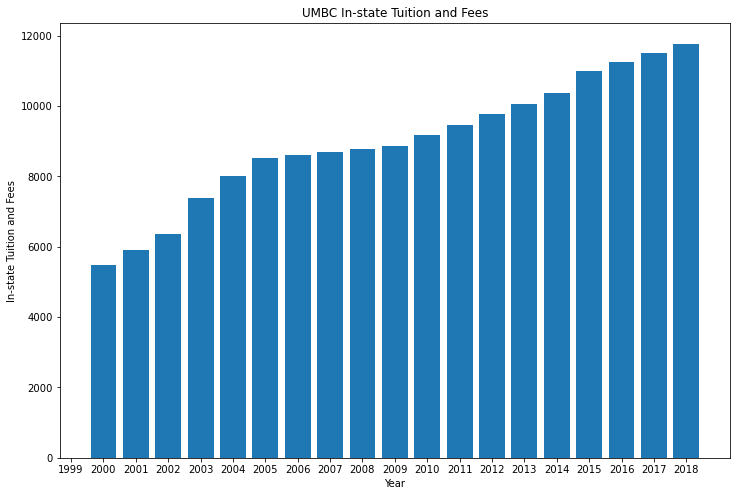

In [257]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart


fig, ax = plt.subplots(figsize=(12,8))

ax.bar(UMBC_data["YEAR"], UMBC_data["TUITIONFEE_IN"])
ax.set_title("UMBC In-state Tuition and Fees")
ax.set_xlabel("Year")
ax.set_ylabel("In-state Tuition and Fees")

fig.show()

<ipython-input-258-d5d99b257437>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


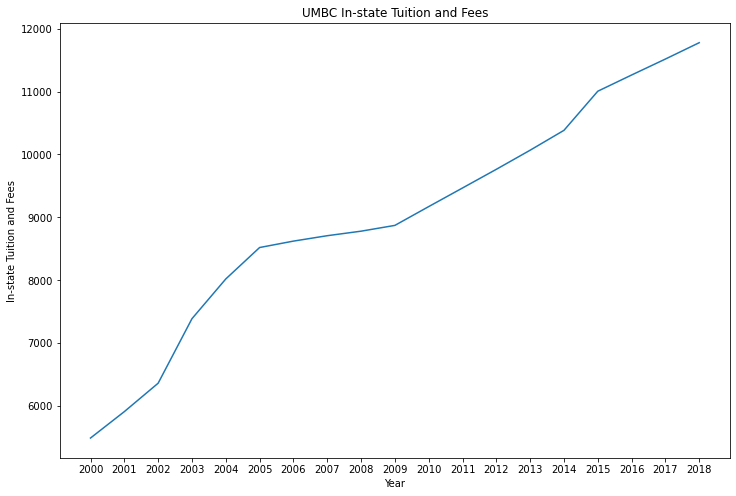

In [258]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(UMBC_data["YEAR"], UMBC_data["TUITIONFEE_IN"])
ax.set_title("UMBC In-state Tuition and Fees")
ax.set_xlabel("Year")
ax.set_ylabel("In-state Tuition and Fees")

fig.show()

In [259]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity



list_of_tuition = UMBC_data['TUITIONFEE_IN'].to_list()
growth_rate_list=[]

for i in range(5,23):
    
    
    growth_rate=((list_of_tuition[i]-list_of_tuition[i-1])/list_of_tuition[i-1])*100
    growth_rate_list.append(round(growth_rate,2))

growth_rate_list
    


[7.65,
 7.65,
 16.13,
 8.55,
 6.23,
 1.2,
 1.0,
 0.83,
 1.05,
 3.37,
 3.23,
 3.14,
 3.11,
 3.14,
 5.99,
 2.34,
 2.25,
 2.26]

In [260]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

full_list=['NaN','NaN','NaN','NaN','NaN']+growth_rate_list

UMBC_data2 = UMBC_data.assign(Percentage_Growth = full_list) 
UMBC_data2.head(10)


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,Percentage_Growth
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
9056,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
15923,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
22598,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
29178,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
35821,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,7.65
42524,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,7.65
49156,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,16.13
55786,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,8.55
62522,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,6.23


<ipython-input-266-b269d838a1f2>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


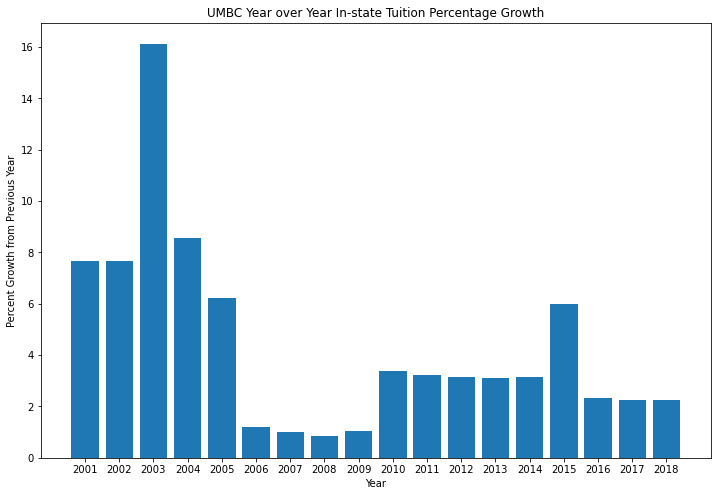

In [266]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

fig, ax = plt.subplots(figsize=(12,8))

ax.bar(UMBC_data2["YEAR"][5:], UMBC_data2["Percentage_Growth"][5:])
ax.set_title("UMBC Year over Year In-state Tuition Percentage Growth")
ax.set_xlabel("Year")
ax.set_ylabel("Percent Growth from Previous Year")

fig.show()

<ipython-input-267-787f1456f1d5>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


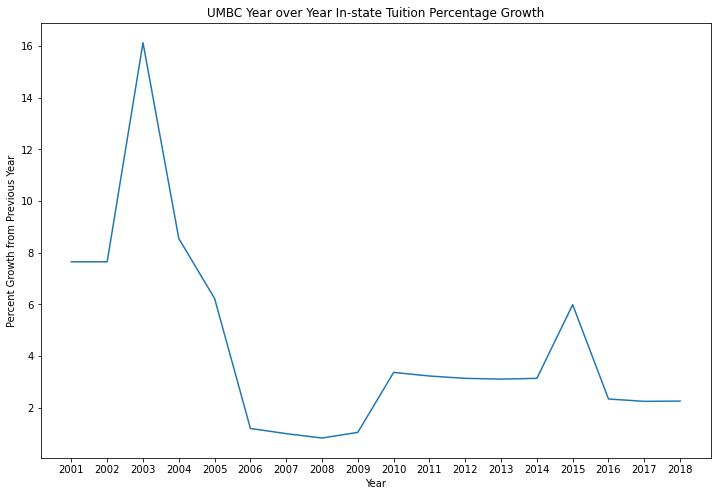

In [267]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(UMBC_data2["YEAR"][5:], UMBC_data2["Percentage_Growth"][5:])
ax.set_title("UMBC Year over Year In-state Tuition Percentage Growth")
ax.set_xlabel("Year")
ax.set_ylabel("Percent Growth from Previous Year")

fig.show()

In [295]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

def percent_change(incoming_list):
    rate_list=[]
    
    for i in range(5,23):
        rate=((incoming_list[i]-incoming_list[i-1])/incoming_list[i-1])*100
        rate_list.append(round(rate,2))
    
    complete_list=['NaN','NaN','NaN','NaN','NaN']+rate_list
    return(complete_list)






In [296]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

JHU_data=data_frame.loc[data_frame['INSTNM'] == 'Johns Hopkins University']
JHU_data.head()


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
9046,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
15914,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
22589,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
29169,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000


<ipython-input-330-c4e854679597>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


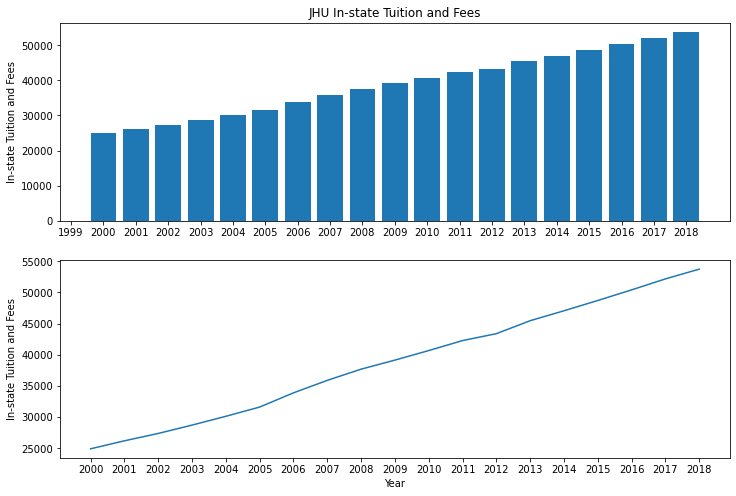

In [330]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together


fig, ax_list = plt.subplots(2,1,figsize=(12,8))


ax_list[0].bar(JHU_data["YEAR"], JHU_data["TUITIONFEE_IN"])
ax_list[0].set_title("JHU In-state Tuition and Fees")
#ax_list[0].set_xlabel("Year")
ax_list[0].set_ylabel("In-state Tuition and Fees")

ax_list[1].plot(JHU_data["YEAR"], JHU_data["TUITIONFEE_IN"])
#ax_list[1].set_title("JHU In-state Tuition and Fees")
ax_list[1].set_xlabel("Year")
ax_list[1].set_ylabel("In-state Tuition and Fees")

fig.show()
#JHU_data2 = JHU_data.assign(Percentage_Growth = percent_change(JHU_data['TUITIONFEE_IN'].to_list())) 
#JHU_data2



In [320]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")


JHU_data2 = JHU_data.assign(PCT_CHANGE = percent_change(JHU_data['TUITIONFEE_IN'].to_list())) 

<ipython-input-329-9ebbb96da6d5>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


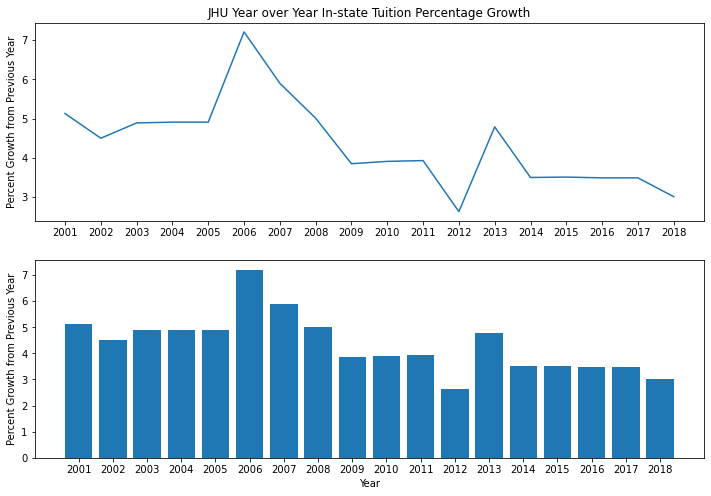

In [329]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

fig, ax_list = plt.subplots(2,1,figsize=(12,8))

ax_list[0].plot(JHU_data2["YEAR"][5:], JHU_data2["PCT_CHANGE"][5:])
ax_list[0].set_title("JHU Year over Year In-state Tuition Percentage Growth")
#ax_list[0].set_xlabel("Year")
ax_list[0].set_ylabel("Percent Growth from Previous Year")

ax_list[1].bar(JHU_data2["YEAR"][5:], JHU_data2["PCT_CHANGE"][5:])
#ax_list[1].set_title("JHU Year over Year In-state Tuition Percentage Growth")
ax_list[1].set_xlabel("Year")
ax_list[1].set_ylabel("Percent Growth from Previous Year")


fig.show()

In [342]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

UMBC_temp=UMBC_data2[['YEAR', 'Percentage_Growth']] 
UMBC2=UMBC_temp.rename(columns={"Percentage_Growth": "UMBC_PCT"})
UMBC2


,YEAR,UMBC_PCT
2151,1996,NaN
9056,1997,NaN
15923,1998,NaN
22598,1999,NaN
29178,2000,NaN
35821,2001,7.65
42524,2002,7.65
49156,2003,16.13
55786,2004,8.55
62522,2005,6.23


In [341]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

JHU_temp=JHU_data2[['YEAR', 'PCT_CHANGE']] 
JHU2=JHU_temp.rename(columns={"PCT_CHANGE": "JHU_PCT"})
JHU2

,YEAR,JHU_PCT
2139,1996,NaN
9046,1997,NaN
15914,1998,NaN
22589,1999,NaN
29169,2000,NaN
35812,2001,5.13
42515,2002,4.5
49148,2003,4.89
55779,2004,4.91
62515,2005,4.91


In [345]:
# Now, merger the two data frames
# and display the new dataframe

merged_frame=UMBC2.merge(JHU2)
merged_frame

,YEAR,UMBC_PCT,JHU_PCT
0,1996,NaN,NaN
1,1997,NaN,NaN
2,1998,NaN,NaN
3,1999,NaN,NaN
4,2000,NaN,NaN
5,2001,7.65,5.13
6,2002,7.65,4.5
7,2003,16.13,4.89
8,2004,8.55,4.91
9,2005,6.23,4.91


<ipython-input-349-252369bc9deb>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


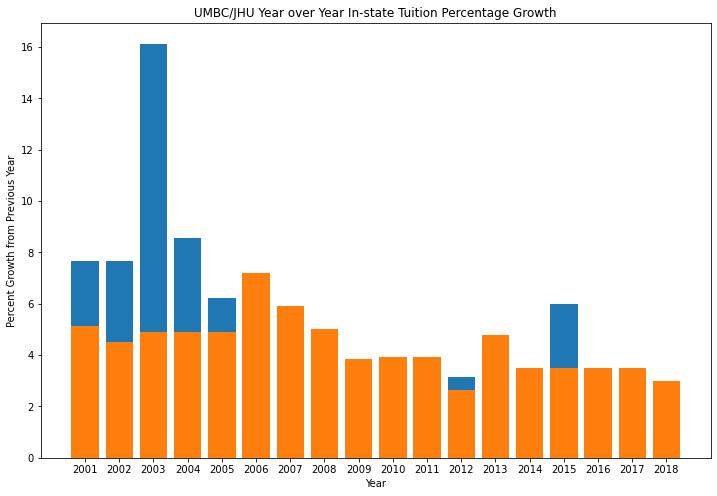

In [349]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

fig, ax = plt.subplots(figsize=(12,8))

ax.bar(UMBC2["YEAR"][5:], UMBC2["UMBC_PCT"][5:])
ax.bar(JHU2["YEAR"][5:], JHU2["JHU_PCT"][5:])
ax.set_title("UMBC/JHU Year over Year In-state Tuition Percentage Growth")
ax.set_xlabel("Year")
ax.set_ylabel("Percent Growth from Previous Year")

fig.show()

<ipython-input-374-4388328ccc5b>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


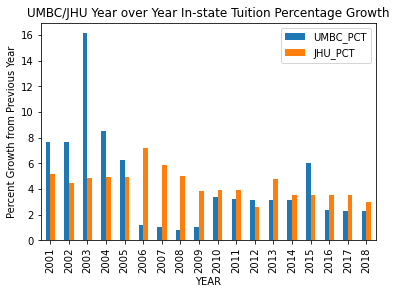

In [374]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

ax=merged_frame[5:].plot.bar("YEAR")
ax.set_title("UMBC/JHU Year over Year In-state Tuition Percentage Growth")
#ax.set_xlabel("Year")
ax.set_ylabel("Percent Growth from Previous Year")

fig.show()

<ipython-input-378-253e458a16b8>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


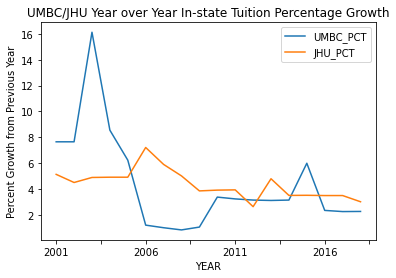

In [378]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

ax=merged_frame[5:].plot("YEAR")
ax.set_title("UMBC/JHU Year over Year In-state Tuition Percentage Growth")

ax.set_ylabel("Percent Growth from Previous Year")

fig.show()

In [ ]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

# Observations
1.  In 2003, UMBC had a large increase in tuition and fees over the previous year.  It would be interesting to look at why this might have been the case.
2.  Both schools had a general decline in the tutition increase from about 2005 to 2009.  After this, the percentage increases increased.  I'm wondering if this had anything to do with the financial crisis of 2008.
3.  For the past few years, the percentage increases appear to be holding steady.